In [2]:
stop = ["시발", "개새끼"]

sentence1 = "야 이 시발 놈아!"
sentence2 = list()

# 1. 사전

for token in sentence1.split():
    if token in stop:
        sentence2.append("*"*len(token))
    else:
        sentence2.append(token)
" ".join(sentence2)

'야 이 ** 놈아!'

In [3]:
import re

In [8]:
from string import punctuation
from nltk import word_tokenize

In [20]:
stop = ["시발", "개새끼"]

sentence1 = "야 이 시발 놈아!"
sentence2 = list()

# 1. 사전
# 2. 정규식-기초
# 3. 구두점 이용 토큰화

# for token in sentence1.split():
for token in word_tokenize(sentence1):
    retoken = re.sub(r"[%s]" % re.escape(punctuation),
              "", token)
    if token in stop:
        sentence2.append("*"*len(retoken))
    else:
        sentence2.append(retoken)
" ".join(sentence2)

'야 이 ** 놈아 '

In [ ]:
stop = ["시발", "개새끼"]

sentence1 = "야 이 시발 놈아!"
sentence2 = list()

# 1. 사전
# 2. 정규식-기초
# 3. 구두점 이용 토큰화

for token in sentence1.split():
    retoken = re.sub(r"[%s]" % re.escape(punctuation),
              "", token)
    if token in stop:
        sentence2.append("*"*len(token))
    else:
        sentence2.append(token)
" ".join(sentence2)

In [13]:
def umjeol(sentence):
    k = len(sentence) + 1
    tokens = list(sentence)
    ngram = []
    for n in range(1, k):
        for i in range(len(tokens)-(n-1)):
            ngram.append("".join(tokens[i:i+n]))
    return ngram

In [16]:
umjeol("가나다라")

['가', '나', '다', '라', '가나', '나다', '다라', '가나다', '나다라', '가나다라']

In [14]:
# 음절!

stop = ["시발", "개새끼"]

sentence1 = "야 이 시발 놈아! 개새끼!! 시발넘"
sentence2 = list()

# 1. 사전
# 2. 정규식-기초
# 3. 구두점 이용 토큰화
# 4. ngram

for token in sentence1.split():
    inStop = False
    for _ in umjeol(token):
        if _ in stop:
            inStop = True
            
    if inStop:
        sentence2.append("*"*len(token))
    else:
        sentence2.append(token)
" ".join(sentence2)

'야 이 ** 놈아! ***** ***'

In [21]:
# 음절!

stop = ["시발", "개새끼"]

sentence1 = "ㅅㅂ 야 이 시!!!!!!!!!!!발놈아! 개새끼!! 시발넘 개시발 시!발"
sentence2 = list()

# 1. 사전
# 2. 정규식-기초
# 3. 구두점 이용 토큰화
# 4. ngram
# 5. 정규식

for token in sentence1.split():
# for token in word_tokenize(sentence1):
    retoken = re.sub(r"[%s]" % re.escape(punctuation),
              "", token)
    inStop = False
    for _ in umjeol(retoken):
        if _ in stop:
            inStop = True
    
    if re.search(r"[ㄱ-ㅎㅏ-ㅣ]{2,}", retoken):
        inStop = True
    
    if inStop:
        sentence2.append("*"*len(token))
    else:
        sentence2.append(token)
" ".join(sentence2)

'** 야 이 **************** ***** *** *** ***'

In [22]:
stop = ["시발", "개새끼"]

# 욕이 아닌 일상어인데 욕 필터링에 걸릴 수도 있다.
# 띄어쓰기를 잘못했을 뿐인데 욕 필터링에 걸릴 수도 있다.
sentence1 = "~~할 시 발생할 수 있는 ~~할 시발생할 ㅅㅂ 야 이 시!!!!!!!!!!!발놈아! 개새끼!! 시발넘 개시발 시!발"
sentence2 = list()

# 1. 사전
# 2. 정규식-기초
# 3. 구두점 이용 토큰화
# 4. ngram
# 5. 정규식

for token in sentence1.split():
# for token in word_tokenize(sentence1):
    retoken = re.sub(r"[%s]" % re.escape(punctuation),
              "", token)
    inStop = False
    for _ in umjeol(retoken):
        if _ in stop:
            inStop = True
    
    if re.search(r"[ㄱ-ㅎㅏ-ㅣ]{2,}", retoken):
        inStop = True
    
    if inStop:
        sentence2.append("*"*len(token))
    else:
        sentence2.append(token)
" ".join(sentence2)

'~~할 시 발생할 수 있는 ~~할 **** ** 야 이 **************** ***** *** *** ***'

---

In [31]:
from collections import defaultdict

In [38]:
str2split = lambda s: " ".join(["<w>"] + list(s) + ["</w>"])

In [39]:
def findPair(data, n=2):
    pair = defaultdict(int)
    for k, v in data.items():
        tokens = k.split()
        for i in range(len(tokens) - (n-1)):
            pair[tuple(tokens[i:i+n])] += v
    return pair

def mergePair(data, maxKey, maxValue, threshold):
    newData = dict()
    for k, v in data.items():
        if maxValue > threshold:
            newK = re.sub(" ".join(maxKey), 
                          "".join(maxKey), k)
        else:
            newK = k
        newData[newK] = v
    return newData

In [143]:
data = {
    str2split("시발"):10,
    str2split("시!!!!!!발"):10,
    str2split("시1발"):10,
    str2split("시asdflkj발"):10,
    str2split("시발놈"):10,
    str2split("시발점"):10,
}

In [144]:
threshold = max(data.values())

for _ in range(100):
    pair = findPair(data)
    maxKey = max(pair, key=pair.get)
    maxValue = pair[maxKey]
    data = mergePair(data, maxKey, maxValue, threshold)
    
tokens_ = list()
for _ in data.keys():
    for token in _.split():
        if len(token) > 1 and token != "</w>" and \
        not token.endswith("</w>"): 
            tokens_.append(token)

In [145]:
data

{'<w>시발</w>': 10,
 '<w>시 !!!! !! 발</w>': 10,
 '<w>시 1 발</w>': 10,
 '<w>시 a s d f l k j 발</w>': 10,
 '<w>시발 놈 </w>': 10,
 '<w>시발 점 </w>': 10}

In [146]:
patterns = defaultdict(int)
for sentence, freq in data.items():
    for _ in sentence.split():
        patterns[_] += freq
{k:v for k,v in patterns.items() 
 if v > threshold and k not in ["<w>", "</w>"]}

{'<w>시': 30, '발</w>': 30, '<w>시발': 20}

In [147]:
patterns = defaultdict(int)
for sentence, freq in data.items():
    for _ in sentence.split():
        patterns[_] += freq
        
# 패턴을 좀 더 정교하게
{re.sub(r"\<\/?w\>", "", k):v for k,v in patterns.items() 
 if v > threshold and k not in ["<w>", "</w>"]}

{'시': 30, '발': 30, '시발': 20}

In [148]:
patterns

defaultdict(int,
            {'<w>시발</w>': 10,
             '<w>시': 30,
             '!!!!': 10,
             '!!': 10,
             '발</w>': 30,
             '1': 10,
             'a': 10,
             's': 10,
             'd': 10,
             'f': 10,
             'l': 10,
             'k': 10,
             'j': 10,
             '<w>시발': 20,
             '놈': 10,
             '</w>': 20,
             '점': 10})

In [149]:
patterns = {k:v for k,v in patterns.items()
            if v > threshold and k not in ["<w>", "</w>"]}
startPattern = [k.replace("<w>", "") for k in patterns 
                if k.startswith("<w>")]
endPattern = [k.replace("</w>", "") for k in patterns 
                if k.endswith("</w>")]
termPattern = [k.replace("<w>", "") for k in patterns 
                if not k.startswith("<w>") and
               not k.endswith("</w>")]


In [150]:
patterns

{'<w>시': 30, '발</w>': 30, '<w>시발': 20}

In [151]:
startPattern

['시', '시발']

In [152]:
endPattern

['발']

In [153]:
termPattern

[]

In [156]:
rePattern = list()
for s in startPattern:    
    for e in endPattern:
        rePattern.append(re.compile(
         r"{0}.*?{1}".format(s, e)))
if len(termPattern) > 0:
    rePattern.append(re.compile(
        r"%s" % "|".join(termPattern)))

In [157]:
rePattern

[re.compile(r'시.*?발', re.UNICODE), re.compile(r'시발.*?발', re.UNICODE)]

In [158]:
data = [
    "시발",
    "시!!!!!!발",
    "시1발",
    "시asdflkj발",
    "시발놈",
    "시발점"]

In [159]:
for _ in data:
    inStop = False
    for p in rePattern:
        if p.search(_):
            inStop = True
    if inStop:
        print("*"*len(_))
    else:
        print(_)

**
********
***
*********
***
***


---

In [160]:
from nltk.tag import pos_tag
pos_tag(word_tokenize("She sells seashells on the seashore."))

[('She', 'PRP'),
 ('sells', 'VBZ'),
 ('seashells', 'NNS'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('seashore', 'NN'),
 ('.', '.')]

In [163]:
# 여러가지 tagset이 있다.
# 필요에 따라 적절한 tagset을 선택해야한다.

from nltk.help import upenn_tagset, brown_tagset
upenn_tagset("NN")

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [164]:
# brown 형태소 분석기를 이용하면 brown_tagset을 이용해야하는 것!

brown_tagset("NN")

NN: noun, singular, common
    failure burden court fire appointment awarding compensation Mayor
    interim committee fact effect airport management surveillance jail
    doctor intern extern night weekend duty legislation Tax Office ...


In [165]:
from konlpy.tag import Kkma
# 꼬마 라고 읽음. / 서울대에서 개발
# 세종 21 corpus를 기반으로 만들었음.
# 가장 자세하게 분류함.
Kkma().tagset

C:\Users\JINHYO\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [166]:
from konlpy.tag import Okt
Okt().tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [167]:
from konlpy.tag import Hannanum
Hannanum().tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [168]:
from konlpy.tag import Komoran
Komoran().tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [ ]:
# 일본에서 만든건데 한국어에도 적용이 잘 된다.
# 리눅스에서만 동작한다.

# from konlpy.tag import Mecab
# Mecab().tagset

세종 21
https://ithub.korean.go.kr/user/corpus/corpusSearchManager.do

꼬꼬마와 세종의 품사표 비교
http://kkma.snu.ac.kr/documents/?doc=postag

In [169]:
kkma = Kkma()
hannanum = Hannanum()
okt = Okt()
komoran = Komoran()

In [170]:
s = "아버지가방에들어가신다"
kkma.pos(s)

[('아버지', 'NNG'),
 ('가방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN')]

> 가방 빼고는 잘 분석하는 편이다.

In [171]:
kkma.tagset["EPH"]

'존칭 선어말 어미'

In [172]:
kkma.pos("들어가신다. 들어가다. 시를 쓰다.")

[('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF'),
 ('들어가', 'VV'),
 ('다', 'EFN'),
 ('.', 'SF'),
 ('시', 'NNG'),
 ('를', 'JKO'),
 ('쓰', 'VV'),
 ('다', 'EFN'),
 ('.', 'SF')]

> 첫번째 '시'와 두번째 '시'는 다른 의미를 가진다.
>
> 그러므로 품사를 같이 봐야한다.

In [173]:
# 한나눔은 최장길이를 찾는 특징이 있다.

hannanum.pos(s)

[('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E')]

In [174]:
komoran.pos(s)

[('아버지', 'NNG'),
 ('가방', 'NNP'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('시', 'EP'),
 ('ㄴ다', 'EC')]

In [175]:
okt.pos(s)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

### 띄어쓰기는 제대로 되었으나, 중의적인 표현을 보자

In [176]:
s = "하늘을 나는 자동차"

In [177]:
kkma.pos(s)

[('하늘', 'NNG'), ('을', 'JKO'), ('날', 'VV'), ('는', 'ETD'), ('자동차', 'NNG')]

In [178]:
# '나'를 명사로 분석해버렸다. 
# 그래서 뒤에 오는 '는'도 조사로 분석해버리는 문제가 생겼다.

hannanum.pos(s)

[('하늘', 'N'), ('을', 'J'), ('나', 'N'), ('는', 'J'), ('자동차', 'N')]

In [179]:
komoran.pos(s)

[('하늘', 'NNG'), ('을', 'JKO'), ('나', 'NP'), ('는', 'JX'), ('자동차', 'NNG')]

In [180]:
okt.pos(s)

[('하늘', 'Noun'), ('을', 'Josa'), ('나', 'Noun'), ('는', 'Josa'), ('자동차', 'Noun')]

성능:
Kkma > Komoran, Okt > Hannanum

단점:
Kkma -> 터짐, 문서 몇개 돌리면 터짐

Kkma가 터지면 2순위로 komoran 또는 okt를 쓰겠음. (이 수업 동안에는)

In [185]:
def eojeol(sentence, n=2):
    ngram = []
    tokens = word_tokenize(sentence)
    for i in range(len(tokens)-(n-1)):
        ngram.append(tuple(tokens[i:i+n]))
    return ngram

In [182]:
from nltk import Text
from nltk.tokenize import regexp_tokenize

In [207]:
from konlpy.corpus import kolaw
corpus = kolaw.open(kolaw.fileids()[0]).read()
text1 = Text(word_tokenize(corpus))
text2 = Text(regexp_tokenize(corpus, r"\b\w+\b"))
text3 = Text(kkma.morphs(corpus))
text4 = Text(kkma.pos(corpus))

In [187]:
tokens = list()
for _ in corpus.split():
    tokens.extend(umjeol(_))
text5 = Text(tokens)
text6 = Text(eojeol(corpus))

In [200]:
def eojeol(sentence, n=2):
    ngram = []
    tokens = sentence
    for i in range(len(tokens)-(n-1)):
        ngram.append(tuple(tokens[i:i+n]))
    return ngram

text7 = Text(eojeol(kkma.morphs(corpus)))

In [208]:
len(corpus.split()), text1.vocab().N(), text2.vocab().N(), text3.vocab().N(), \
text4.vocab().N(), text5.vocab().N(), text6.vocab().N(), text7.vocab().N()

(4178, 4640, 4325, 10053, 10053, 37477, 4639, 10052)

In [209]:
len(corpus.split()), text1.vocab().B(), text2.vocab().B(), text3.vocab().B(), \
text4.vocab().B(), text5.vocab().B(), text6.vocab().B(), text7.vocab().B()

(4178, 2023, 2085, 1247, 1294, 10745, 3441, 4297)

In [212]:
for _ in list(zip(text1.vocab().most_common(10),
                 text2.vocab().most_common(10),
                 text3.vocab().most_common(10),
                 text4.vocab().most_common(10),
                 text5.vocab().most_common(10),
                 text6.vocab().most_common(10),
                 text7.vocab().most_common(10))):
    print(_)
    print()

(('.', 357), ('수', 87), ('의', 532), (('의', 'JKG'), 532), ('의', 655), (('있다', '.'), 57), (('ㄴ다', '.'), 243))

((',', 101), ('①', 75), ('하', 457), (('.', 'SF'), 359), ('하', 406), (('한다', '.'), 56), (('저', '의'), 155))

(('수', 87), ('또는', 70), ('.', 359), (('하', 'XSV'), 350), ('한', 403), (('수', '있다'), 56), (('.', '저'), 133))

(('①', 75), ('의하여', 66), ('에', 328), (('에', 'JKM'), 328), ('에', 367), (('법률이', '정하는'), 48), (('하', 'ㄴ다'), 114))

(('또는', 70), ('법률이', 57), ('는', 281), (('ㄴ다', 'EFN'), 243), ('는', 363), (('정하는', '바에'), 37), (('하', 'ㄴ'), 89))

(('의하여', 66), ('있다', 57), ('ㄴ다', 243), (('ㄴ', 'ETD'), 234), ('.', 360), (('바에', '의하여'), 36), (('다', '.'), 88))

(('법률이', 57), ('한다', 56), ('ㄴ', 234), (('을', 'JKO'), 211), ('다', 354), (('법률로', '정한다'), 28), (('ㄹ', '수'), 86))

(('있다', 57), ('정하는', 50), ('을', 232), (('은', 'JX'), 182), ('다.', 332), (('정한다', '.'), 28), (('하', 'ㄹ'), 85))

(('한다', 56), ('그', 44), ('은', 195), (('는', 'JX'), 180), ('국', 325), (('가진다', '.'), 25), (('에', '의하'), 83))

(('정하는', 

> 음절, 형태소 분석기 만으로는 성능이 잘 안나오는 경우가 분명히 있을 것이다.
>
> 음절단위 패턴, 어절단위 패턴, 형태소단위 패턴 이 필요할 것이다.
>
> 여러가지 분석기를 써보고 직접 패턴을 찾는것도 좋다.
>
> 바이그램이 적당하게 쓸 만할 것이다.

In [222]:
import os
basedir = "practice/8일차_실습_project/헤드라인/"

corpus1 = list()
for file in [_ for _ in os.listdir(basedir)
            if _.startswith("정치-")]:
    with open(basedir+file, encoding="utf-8") as fp:
        corpus1.append(fp.read())
        
        
corpus2 = list()
for file in [_ for _ in os.listdir(basedir)
            if _.startswith("IT 과학-")]:
    with open(basedir+file, encoding="utf-8") as fp:
        corpus2.append(fp.read())

In [223]:
corpus1 = okt.pos("\n".join(corpus1))
corpus2 = okt.pos("\n".join(corpus2))

In [224]:
def eojeol(tokens, n=2):
    ngram = []
    for i in range(len(tokens)-(n-1)):
        ngram.append(" ".join(tokens[i:i+n]))
    return ngram

In [225]:
# 정치

text1 = Text([_[0] for _ in corpus1])
text2 = Text(eojeol([_[0] for _ in corpus1]))
list(zip(text1.vocab().most_common(10), text2.vocab().most_common(10)))

[(('.', 627), ('했다 .', 238)),
 (('을', 609), ('조 장관', 85)),
 (('이', 565), ('한국 당', 80)),
 (('"', 362), ('” 고', 71)),
 (('를', 358), ('콘텐츠 산업', 60)),
 (('의', 334), ('하고 있다', 58)),
 (('에', 305), ('" 고', 57)),
 (('은', 281), ('있다 .', 53)),
 (('했다', 253), ('" 며', 46)),
 ((',', 252), ('장관 은', 46))]

In [227]:
# IT 과학

text1 = Text([_[0] for _ in corpus2])
text2 = Text(eojeol([_[0] for _ in corpus2]))
list(zip(text1.vocab().most_common(10), text2.vocab().most_common(10)))

[(('.', 417), ('했다 .', 72)),
 (('을', 304), ('있다 .', 70)),
 (('이', 257), ('이다 .', 63)),
 (('를', 254), ('블록 체인', 58)),
 (('에', 225), ('할 수', 45)),
 (('의', 210), ('위 한', 28)),
 (('가', 149), ('수 있다', 25)),
 (('는', 145), ('체인 게임', 25)),
 ((',', 140), ('. 이', 25)),
 (('한', 130), ('카카오 모빌리티', 24))]

---

# collocation

In [258]:
text = Text(kkma.morphs(corpus))

In [259]:
# 단어가 있는 위치의 정보를 보여준다
# 주변 단어에 어떤 문맥이 있는지 보고자 할때 유용할 것이다.

text.concordance("국민")

Displaying 25 of 69 matches:
대한민국 헌법 유구 하 ㄴ 역사 와 전통 에 빛나 는 우리 대하 ㄴ 국민 은 3 · 1 운동 으로 건립 되 ㄴ 대한민국 임시 정부 의 법통 
리 에 따르 는 책임 과 의무 를 완수 하 게 하여 , 안 으로 는 국민 생활 의 균등 하 ㄴ 향상 을 기하 고 밖 으로 는 항구적 이 ㄴ 
 에 걸치 어 개정 되 ㄴ 헌법 을 이제 국회 의 의결 을 거치 어 국민 투표 에 의하 여 개정 하 ㄴ다 . 저 의 1 장 총 강 제 1 조
조 ① 대한민국 은 민주 공화국 이 다 . ② 대한민국 의 주권 은 국민 에게 있 고 , 모든 권력 은 국민 으로 부터 나오 ㄴ다 . 저 의
다 . ② 대한민국 의 주권 은 국민 에게 있 고 , 모든 권력 은 국민 으로 부터 나오 ㄴ다 . 저 의 2 조 ① 대한민국 의 국민 이 되
력 은 국민 으로 부터 나오 ㄴ다 . 저 의 2 조 ① 대한민국 의 국민 이 되 는 요건 은 법률 로 정하 ㄴ다 . ② 국가 는 법률 이 정
 정하 ㄴ다 . ② 국가 는 법률 이 정하 는 바 에 의하 여 재외 국민 을 보호 하 ㄹ 의무 를 질 ㄴ다 . 저 의 3 조 대한민국 의 영
의하 여 그 지위 가 보장 되 ㄴ다 . 저 의 7 조 ① 공무원 은 국민 전체 에 대하 ㄴ 봉사자 이 며 , 국민 에 대하 여 책임 을 질 
 의 7 조 ① 공무원 은 국민 전체 에 대하 ㄴ 봉사자 이 며 , 국민 에 대하 여 책임 을 질 ㄴ다 . ② 공무원 의 신분 과 정치적 중
 정당 은 그 목적 · 조직 과 활동 이 민주적 이 어야 하 며 , 국민 의 정치적 의사 형성 에 참여 하 는데 필요 하 ㄴ 조직 을 가지 
과 민족 문화 의 창달 에 노력 하 여야 하 ㄴ다 . 저 의 2 장 국민 의 권리 와 의무 제 10 조 모든 국민 은 인간 으로서 의 존엄 
하 ㄴ다 . 저 의 2 장 국민 의 권리 와 의무 제 10 조 모든 국민 은 인간 으로서 의 존엄 과 가치 를 가지 며 , 행복 을 추구 하
이르 ㄹ 보장 하 ㄹ 의무 를 질 ㄴ다 .

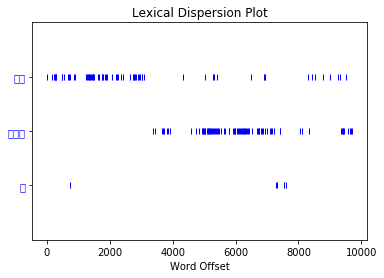

In [261]:
%matplotlib inline

text.dispersion_plot(["국민", "대통령", "법"])

In [262]:
text.similar("국민")

저 국가 법관 법원 대통령 대한민국 정부 조국 국회 공무원 재판 타인 판결 근로 여자 국회의원 법률안 법령 농지 운동


In [263]:
text.collocations()

ValueError: too many values to unpack (expected 2)

In [239]:
from nltk.corpus import brown, gutenberg

In [319]:
Emma = gutenberg.open(gutenberg.fileids()[0]).read()

In [311]:
# Emma = [_[0] for _ 
#              in pos_tag(word_tokenize(Emma.lower()))]

# emma = Text(Emma)

In [321]:
emma = Text(_[0] for _ 
             in pos_tag(word_tokenize(Emma.lower())))

In [322]:
emma.similar("emma")

she it he i weston you her harriet elton him me knightley jane that
and the all there they them


In [323]:
emma.similar("jane")

he it emma she miss weston i harriet that her there you knightley
elton all him me what then as


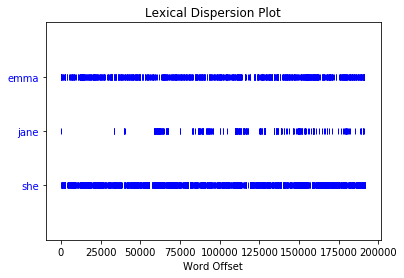

In [324]:
# she가 emma와 비슷한 비중과 위치에서 사용되는걸 보니, emma는 여자일 것이다.
# emma를 수식하면서 she를 많이 썼을 것이다.

emma.dispersion_plot(["emma", "jane", "she"])

In [327]:
from inspect import getsource

In [328]:
print(getsource(emma.collocations))

    def collocations(self, num=20, window_size=2):
        """
        Print collocations derived from the text, ignoring stopwords.

        :param num: The maximum number of collocations to print.
        :type num: int
        :param window_size: The number of tokens spanned by a collocation (default=2)
        :type window_size: int
        """

        collocation_strings = [
            w1 + " " + w2 for w1, w2 in self.collocation_list(num, window_size)
        ]
        print(tokenwrap(collocation_strings, separator="; "))



In [335]:
collocation_strings = [
            w1 for w1 in emma.collocation_list()
        ]

In [341]:
from nltk import tokenwrap

In [ ]:
collocation_strings = [
            w1 + " " + w2 for w1, w2 in self.collocation_list(num, window_size)
        ]
print(tokenwrap(collocation_strings, separator="; "))

In [340]:
t = ""
for _ in collocation_strings:
    t += _ +"; "
print(t)

mr. knightley; mrs. weston; frank churchill; mr. elton; miss woodhouse; miss bates; mrs. elton; miss fairfax; every body; mr. weston; jane fairfax; every thing; mr. woodhouse; young man; great deal; dare say; maple grove; mrs. goddard; john knightley; miss smith; 


In [326]:
emma.collocation_list()

['mr. knightley',
 'mrs. weston',
 'frank churchill',
 'mr. elton',
 'miss woodhouse',
 'miss bates',
 'mrs. elton',
 'miss fairfax',
 'every body',
 'mr. weston',
 'jane fairfax',
 'every thing',
 'mr. woodhouse',
 'young man',
 'great deal',
 'dare say',
 'maple grove',
 'mrs. goddard',
 'john knightley',
 'miss smith']

In [332]:
import nltk

In [333]:
nltk.__version__

'3.4.4'

In [329]:
[w1 + " " + w2 for w1, w2 in emma.collocation_list()]

ValueError: too many values to unpack (expected 2)

In [325]:
emma.collocations()

ValueError: too many values to unpack (expected 2)

In [265]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

In [269]:
bigram = BigramCollocationFinder.from_words(Emma)

In [270]:
bigram.nbest(BigramAssocMeasures().pmi, 10)

[('26th', 'ult.'),
 ('_______', 'regiment'),
 ('_a_', '_source_'),
 ('_amor_', '_patriae_'),
 ('_and_', '_misery_'),
 ('_any_', '_thing_'),
 ('_be_', '_a_'),
 ('_caro_', '_sposo_'),
 ('_dissolved_', '_it_.'),
 ('_great_', '_way_')]

## 한글

In [273]:
# kolaw

bigram = BigramCollocationFinder.from_words(Text(kkma.morphs(corpus)))
bigram.nbest(BigramAssocMeasures().pmi, 10)

[('가부', '동수'),
 ('강제', '노역'),
 ('경자', '유전'),
 ('공무', '담임'),
 ('공중', '도덕'),
 ('과반', '수가'),
 ('교전', '상태'),
 ('기본적', '인권'),
 ('노인과', '청소년'),
 ('다수', '표')]

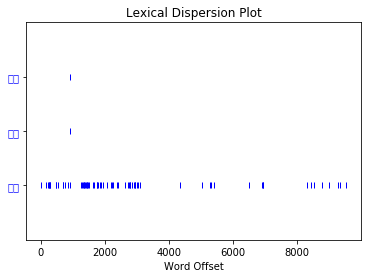

In [307]:
text.dispersion_plot(["강제", "노역", "국민"])

In [309]:
text.collocations(20, 2)

ValueError: too many values to unpack (expected 2)

> bigram으로 "강제"와 "노역"이 자주 붙어서 사용된다고 한다.
>
> lexical dispersion으로 어디에 위치하고 있는지 보고 실제로 연관이 있는지 알 수 있다.

In [272]:
# 정치

bigram1 = BigramCollocationFinder.from_words(
            [_[0] for _ in corpus1])
bigram1.nbest(BigramAssocMeasures().pmi, 20)

[('"[', '앵커'),
 ('+', 'α'),
 ('10분', '가량'),
 ('10시', '34분'),
 ('11월', '통합진보당'),
 ('180만', '명으로'),
 ('1조', '7천억원'),
 ('200', '평'),
 ('2013년', '11월'),
 ('2016년', '동서대'),
 ('586', '들은'),
 ('5월', '30일'),
 ('6시', '30분'),
 ('6월', '께까지'),
 ('7천', '400억원'),
 ('95억', '5천만달러'),
 ('Justice', 'League'),
 ('MSI', '주가'),
 ('NBC', '리메이크'),
 ('Remember', '804')]

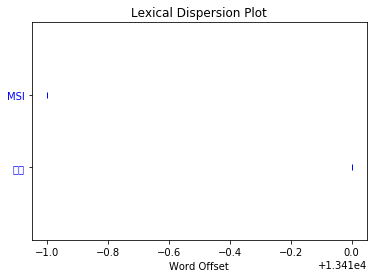

In [282]:
text1.dispersion_plot(["MSI", "주가"])

---

In [289]:
from nltk.chunk.regexp import RegexpParser
tagged_sentence = pos_tag(word_tokenize("The little yellow dog varettde".lower()))
[_[1] for _ in tagged_sentence]

['DT', 'JJ', 'JJ', 'NN', 'NN']

In [292]:
np = RegexpParser("""
    NP: {<DT><JJ>*<nnn>}
""")

In [293]:
np.parse(tagged_sentence).draw()

In [295]:
kkma.pos("내 친구가 잠을 많이 잔다." )z

[('내', 'NP'),
 ('친구', 'NNG'),
 ('가', 'JKS'),
 ('잠', 'NNG'),
 ('을', 'JKO'),
 ('많이', 'MAG'),
 ('자', 'VV'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

In [299]:
tagged = kkma.pos("내 친구가 잠을 많이 잔다.")

RegexpParser("""
    NP: {<NP|NNG>+<JK[A-Z]>}
    VP: {<MA.?>?<VV|VX><EF.?>}
""").parse(tagged).draw()

In [301]:
result = RegexpParser("""
    NP: {<NP|NNG>+<JK[A-Z]>}
    VP: {<MA.?>?<VV|VX><EF.?>}
""").parse(tagged)

In [302]:
trees = list(result.subtrees())
for _ in trees:
    print(_)

(S
  (NP 내/NP 친구/NNG 가/JKS)
  (NP 잠/NNG 을/JKO)
  (VP 많이/MAG 자/VV ㄴ다/EFN)
  ./SF)
(NP 내/NP 친구/NNG 가/JKS)
(NP 잠/NNG 을/JKO)
(VP 많이/MAG 자/VV ㄴ다/EFN)


In [263]:
text.collocations()

ValueError: too many values to unpack (expected 2)